In [1]:
from ml_model_forward import ForwardTMMModel
import pandas as pd
from sklearn.model_selection import train_test_split

training_data = pd.read_csv("R.csv")

data_train, data_test = train_test_split(training_data, test_size=0.1)

model = ForwardTMMModel()

2023-06-19 21:04:02.058042: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 21:04:02.124585: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 21:04:02.125850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 21:04:03.057792: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
feature_cols = ["d1", "d2", "d3", "d4", "d5", "d6", "First Layer", "Second Layer"]

history = model.train(data_train[feature_cols], data_train[[c for c in data_train.columns if c not in feature_cols]])

Epoch 1/100


2023-06-19 21:04:08.811158: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 68234400 exceeds 10% of free system memory.


760/760 [==============================] - 5s 4ms/step - loss: 0.0530 - val_loss: 0.0142
Epoch 2/100
760/760 [==============================] - 3s 3ms/step - loss: 0.0121 - val_loss: 0.0100
Epoch 3/100
760/760 [==============================] - 3s 4ms/step - loss: 0.0091 - val_loss: 0.0078
Epoch 4/100
760/760 [==============================] - 3s 4ms/step - loss: 0.0068 - val_loss: 0.0054
Epoch 5/100
760/760 [==============================] - 3s 3ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 6/100
760/760 [==============================] - 3s 3ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 7/100
760/760 [==============================] - 2s 3ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 8/100
760/760 [==============================] - 2s 3ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/100
760/760 [==============================] - 2s 3ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 10/100
760/760 [==============================] - 2s 3ms/step - loss: 0.0025 - val_loss: 0.0022
E

In [3]:
import matplotlib.pyplot as plt

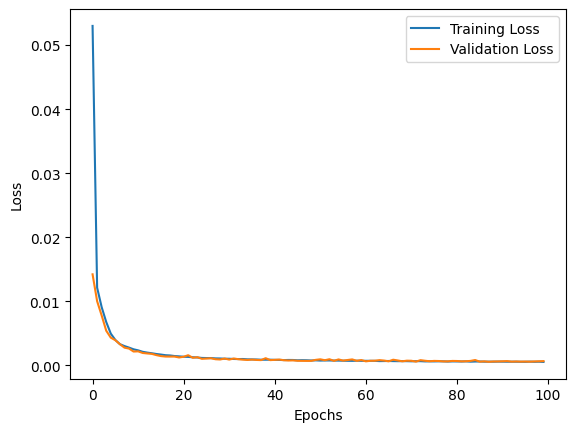

In [4]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
import random
import numpy as np
# Select a random index from the test set
index = random.randint(0, len(data_test[feature_cols]) - 1)
# index = 2849

# Get the corresponding input and output values
input_sample = data_test[feature_cols].iloc[[index]]
output_sample = data_test[[c for c in data_test.columns if c not in feature_cols]].iloc[[index]]

# Make a prediction for the selected sample
prediction = model.predict(input_sample)
output_sample = np.squeeze(output_sample)
prediction = np.squeeze(prediction)
fig,ax = plt.subplots()
x = np.arange(400,751)
ax.plot(x, output_sample, label='Actual')
ax.plot(x, prediction, label='Pred')
ax.set_ylim(0,1)
ax.legend()
plt.show()

TypeError: require_trained.<locals>.decorator() takes 1 positional argument but 2 were given

In [ ]:
model.save("forward_model")

INFO:tensorflow:Assets written to: forward_model/assets


INFO:tensorflow:Assets written to: forward_model/assets
